
# Project: Investigate a Dataset (TMDB movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### About the dataset

The dataset is called TMDB movie data. Downlaoded from [this page](https://www.google.com/url?q=https://www.kaggle.com/tmdb/tmdb-movie-metadata&sa=D&ust=1532469042115000), its original version was removed by [kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata) and replaced with a similar set of films and data fields from [The Movie Database (TMDb)](https://www.kaggle.com/tmdb/themoviedb.org). It contains more than 5000 movies and their rating and basic move information, including user ratings and revenue data.

A successfull movie is avaluated by its popularity, vote average score(Ratings) and revenue. There are some keys that can affect the success of a movie. For example the Budget, Cast, Director, Tagline Keywords, Runtime, Genres, Production Companies, Release Date, Vote Average, etc.



Looking at how the data is, various questions can be asked. For example - How was the popularity of a movie over the years ?  - Considering the five recent years, how is the distribution of revenue in different score rating levels ? how is the distribution of revenue in different popularity levels ? What kinds of properties are associated with movies that have high popularity? What kinds of properties are associated with movies that have high voting score? How many movies are released year by year ? What are the keywords trends by generation ? 

In this presentation, based on this dataset we are going to answer the questions above. 


In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

##### Let's load the first record of the dataframe to see how the database looks like

In [3]:
# Load the data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


##### let's check now general info about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Judging form the info above, the dataset has 10866 entries and 21 colums. The types used are int, float and string. Form the total number of entries and the number of entries per column, a lot of columns have null values. Let's check the exact number of null records per column.

In [8]:
list(df.isnull().sum().items())

[('id', 0),
 ('imdb_id', 10),
 ('popularity', 0),
 ('budget', 0),
 ('revenue', 0),
 ('original_title', 0),
 ('cast', 76),
 ('homepage', 7930),
 ('director', 44),
 ('tagline', 2824),
 ('keywords', 1493),
 ('overview', 4),
 ('runtime', 0),
 ('genres', 23),
 ('production_companies', 1030),
 ('release_date', 0),
 ('vote_count', 0),
 ('vote_average', 0),
 ('release_year', 0),
 ('budget_adj', 0),
 ('revenue_adj', 0)]

Looking at the result above, we see that the colums that have null values are cast, homepage, director, tagline, keywodds, overview, genres, production companies. We also see that homepage, tagline, keywords and production_companies have a lot of null records. I decided to get rid of tagline and keywords since they have a lot of null values. 

Let's try to get more descriptive information from the dataset

In [9]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


If we look at the popularity column, we can find some outliers. since it has no upperbond, it is better to just retain the original data. We can see that there is a lot of zero values in the budget, revenue and runtime columns. The first guess might be that these movies were not released but if we look at the release_year column we can notice that the minimum value (1996) is avalid year and that there were no null values. Therefore those movies were released. May be the zeroes mean the abscence of data. However, in order to decide on that let's check closely those records

First for the budget

In [10]:
df_budget_zero = df.query('budget == 0')
df_budget_zero.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04


Then for the revenue

In [11]:
df_revenue_zero = df.query('revenue == 0')
df_revenue_zero.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0


After checking for Mr Afonso poyart on the film [Solace](https://en.wikipedia.org/wiki/Solace_(2015_film)#Production) on wikkipedia, I noteiced that the film was actually a success. WHich means that there was a sucessful release wich also means that there was a budget. Therefore, the zero values were missing data. I would decide based on that to drop the records since this might affect the statistics od the result of my analysis.  

Subsequently, lets check the number of null values to decide if the zeros should just be set as ull or completely droped out.

###### First for the budget zero values

In [12]:
df_budget_0count =  df.groupby('budget').count()['id']
df_budget_0count.head(2)

budget
0    5696
1       4
Name: id, dtype: int64

As suggested by the results, there are a lot of zero values than non zero values. Dropping them out would corrupt the results. I better set them as null instead.

##### Then for the revenue zero values

In [13]:
df_revenue_0count =  df.groupby('revenue').count()['id']
df_revenue_0count.head(2)

revenue
0    6016
2       2
Name: id, dtype: int64

Same situation. Set to null

##### Finally for the runtime

In [14]:
df_runtime_0count =  df.groupby('runtime').count()['id']
df_runtime_0count.head(2)

runtime
0    31
2     5
Name: id, dtype: int64

The number of zeroes is negligible, they can be droupped out

#### Summary 

* Remove some columns with a lot of null values and unnecessary ones for answering the questions : homepage, tagline, imdb_id, overview, budget_adj, revenue_adj.
* Remove duplicated data 
* Remove all null values in the columns that have null values
* Replace zero values with null values in the budget and revenue column.
* Drop the lines with runtime == 0.

### Data Cleaning

#### Step 1. Remove some columns with a lot of null values and unnecessary ones for answering the questions : homepage, tagline, imdb_id, overview, budget_adj, revenue_adj.

In [17]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
col = ['imdb_id', 'homepage', 'tagline', 'overview', 'budget_adj', 'revenue_adj']
df.drop(col, axis=1, inplace=True)
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


#### Step 2. Remove duplicated data

In [18]:
df.drop_duplicates(inplace=True)

#### Step 3. Remove all null values in the columns that have null values

In [22]:
cells = ['cast', 'director', 'genres']
df.dropna(subset = cells, how='any', inplace=True)
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


Let's check if there are still null values

In [23]:
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
director                   0
keywords                1425
runtime                    0
genres                     0
production_companies     959
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

#### Step 4. Replace zero values with null values in the budget and revenue column.

In [24]:
df['budget'] = df['budget'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)
# Let's check if nulls are added in budget and revenue columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10731 non-null  int64  
 1   popularity            10731 non-null  float64
 2   budget                5153 non-null   float64
 3   revenue               4843 non-null   float64
 4   original_title        10731 non-null  object 
 5   cast                  10731 non-null  object 
 6   director              10731 non-null  object 
 7   keywords              9306 non-null   object 
 8   runtime               10731 non-null  int64  
 9   genres                10731 non-null  object 
 10  production_companies  9772 non-null   object 
 11  release_date          10731 non-null  object 
 12  vote_count            10731 non-null  int64  
 13  vote_average          10731 non-null  float64
 14  release_year          10731 non-null  int64  
dtypes: float64(4), int6

#### Step 5. Drop the runtime column.

In [27]:
df.query('runtime != 0', inplace=True)
df.query('runtime == 0')

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


Let's now verify the info of the dataset

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10703 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10703 non-null  int64  
 1   popularity            10703 non-null  float64
 2   budget                5150 non-null   float64
 3   revenue               4843 non-null   float64
 4   original_title        10703 non-null  object 
 5   cast                  10703 non-null  object 
 6   director              10703 non-null  object 
 7   keywords              9293 non-null   object 
 8   runtime               10703 non-null  int64  
 9   genres                10703 non-null  object 
 10  production_companies  9759 non-null   object 
 11  release_date          10703 non-null  object 
 12  vote_count            10703 non-null  int64  
 13  vote_average          10703 non-null  float64
 14  release_year          10703 non-null  int64  
dtypes: float64(4), int6

In [29]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10703.000000,10703.000000,5.150000e+03,4.843000e+03,10703.000000,10703.000000,10703.000000,10703.000000
mean,64904.988321,0.653818,3.084401e+07,8.933981e+07,102.736896,220.333178,5.966112,2001.235355
std,91161.996308,1.005687,3.893782e+07,1.621546e+08,30.079331,579.481969,0.930155,12.825920
min,5.000000,0.000188,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000
25%,10538.500000,0.211533,6.000000e+06,7.779664e+06,90.000000,17.000000,5.400000,1995.000000
50%,20235.000000,0.388036,1.750000e+07,3.191160e+07,99.000000,39.000000,6.000000,2006.000000
75%,73637.000000,0.722438,4.000000e+07,1.000000e+08,112.000000,149.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


From the table above, we can see that replacing the zeros by null values in the `budget` and `revenue` distribution made them look better. We can also see that the minimum makes now more sense

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1. How was the popularity of a movie over the years ?

let's have a look at the dataset

In [30]:
df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015


let's compute the mean of popularity in each year, and then plot lines to see the trends. In case the mean of popularity is affected by the outlier and since the popularity has no upper bound, we will also compute the median for analysising this question.

In [31]:
p_mean = df.groupby('release_year').mean()['popularity']
p_mean.tail()

release_year
2011    0.685607
2012    0.620326
2013    0.639309
2014    0.910027
2015    1.055081
Name: popularity, dtype: float64

In [32]:
p_median = df.groupby('release_year').median()['popularity']
p_median.tail()

release_year
2011    0.420930
2012    0.344263
2013    0.356506
2014    0.383337
2015    0.407396
Name: popularity, dtype: float64

As shown by the second test, the data with the median is more smother. 

Let's do the visualization now

In [33]:
# Axis
index_mean = p_mean.index
index_median = p_median.index

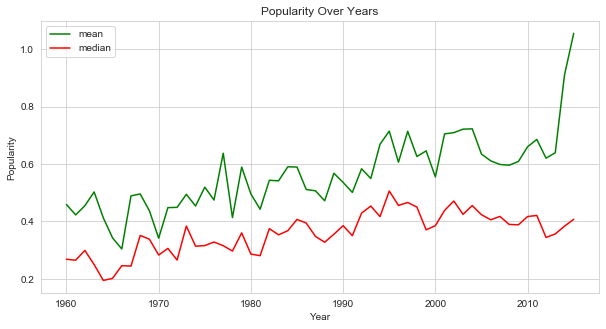

In [35]:
# Style
sns.set_style('whitegrid')


#set x, y axis data
#x1, y1 for mean data; x2, y2 for median data
x1, y1 = index_mean, p_mean
x2, y2 = index_median, p_median



#set size
plt.figure(figsize=(10, 5))


#plot line chart for mean and median
plt.plot(x1, y1, color = 'g', label = 'mean')
plt.plot(x2, y2, color = 'r', label = 'median')


#set title and labels
plt.title('Popularity Over Years')
plt.xlabel('Year')
plt.ylabel('Popularity');


#set legend
plt.legend(loc='upper left')

Looking at the result above, we can notice that year after year kept on increasing untill the pick in 2015. We can also notice that the trend of popularity median is quite smother between 2000 and 2010. Therefore, we can conclude that over the years, the popularity kept on going up and was even higher in 2015. We can predict that it makes sense and it is reasonable because over the years, the access of movie gets easier and easier. Moreover, because it is now pretty simple to access internet, people easily gether movie info even stream movies on websites such as netflix. 


### Research Question 2. - Considering the five recent years, how is the distribution of revenue in different score rating levels ? how is the distribution of revenue in different popularity levels ? 

We have just noticed the the movies popularity is growing up even in the recent years. In this section we are going to focus on the popularity in defrent revenue levels and take some conclusion based on the results we will get. For example, will the popularity be higher in the higher revenue level ? 

The revenue trend is affected by many factors like inflation, etc. Thus, it won't be part of our discussion on this section. This will help keep the. analysis pretty simple even if the database contains adjusted data. Moreover, I noticed that the movie revenue trend is growing up therefore it won't infer that the trend up is related to popularity just by looking at the revenue trend line chart year by year.

Subsequently, it is important to find out how the distribution of popularity looks like in terms of diferent revenue levels. Hence, a good approach would be dividing the revenue data into five levels: 'Low', 'Medium', 'Moderately High', 'High' according to their quartile and just use the the five recent yearns so that I focus on the current data feature. 

Let's create a fuction called cut_into_quartile which will help us in further analysis.

In [36]:
def cut_into_quantile(dfname ,column_name):
    # Bin edges that will be used to "cut" the data into groups
    bin_edges = [
        dfname[column_name].min(),
        dfname[column_name].describe()[4],
        dfname[column_name].describe()[5],
        dfname[column_name].describe()[6],
        dfname[column_name].max()
    ]
    

    dfname['{}_levels'.format(column_name)] = pd.cut(
        dfname[column_name],
        bin_edges,
        labels=[ 'Low', 'Medium', 'Moderately High', 'High'],
        include_lowest = True
    )
    
    return dfname

Let's divide revenue levels with each years revenue quartile to avoid data collision between years. 

In [37]:
#creat a empty dataframe,df_q2
df_q2 = pd.DataFrame()

#for each year, do the following procedure
for year in [2011,2012,2013,2014,2015]:
    dfn = df.query('release_year == "%s"' % year) # first filter dataframe with the selected year 
    dfn2 = cut_into_quantile(dfn,'revenue') #apply the cut_into_quantile with the selected frame, store it to dfn2 
    df_q2 = df_q2.append(dfn2) #append dfn2 to df_q2
df_q2.info()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3035 entries, 3371 to 628
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    3035 non-null   int64   
 1   popularity            3035 non-null   float64 
 2   budget                1227 non-null   float64 
 3   revenue               1143 non-null   float64 
 4   original_title        3035 non-null   object  
 5   cast                  3035 non-null   object  
 6   director              3035 non-null   object  
 7   keywords              2385 non-null   object  
 8   runtime               3035 non-null   int64   
 9   genres                3035 non-null   object  
 10  production_companies  2703 non-null   object  
 11  release_date          3035 non-null   object  
 12  vote_count            3035 non-null   int64   
 13  vote_average          3035 non-null   float64 
 14  release_year          3035 non-null   int64   
 15  re

Notice that the revenue_levels column with the same rows as the revenue column.

Then let's use the dataset to explore the popularity in each level each year.

In [38]:
dfq2_summary = df_q2.groupby(['release_year','revenue_levels']).median()
dfq2_summary.tail(8)

id  popularity      budget      revenue  \
release_year revenue_levels                                                   
2014         Low              244783.0    0.559472   5500000.0     149337.0   
             Medium           234200.0    0.778247   6000000.0    6833445.0   
             Moderately High  227157.5    1.144553  22000000.0   53506007.5   
             High             157350.0    3.327799  68000000.0  268031828.0   
2015         Low              301284.0    0.506000   7500000.0     228615.0   
             Medium           272606.5    0.921828  13000000.0   11893552.5   
             Moderately High  273980.0    1.750452  19000000.0   61365324.5   
             High             253770.0    3.923328  81000000.0  244935102.0   

                              runtime  vote_count  vote_average  
release_year revenue_levels                                      
2014         Low                 96.0       129.0          6.00  
             Medium             102.0       234.0          6.30  
             Moderately High    106.0       478.5          6.30  
             High               113.0      1829.0          6.60  
2015         Low                 98.5        79.5          5.85  
             Medium             105.0       242.5          6.15  
             Moderately High    108.0       614.5          6.40  
             High               117.0      1576.5          6.50

Let's plot the results

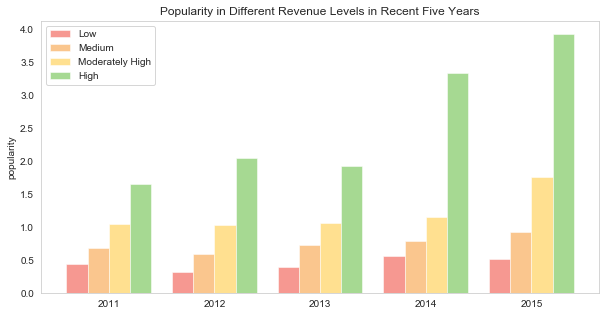

In [42]:
# Setting the positions and width for the bars
pos = list(range(len(dfq2_summary.query('revenue_levels =="Low"'))))
width = 0.2 

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with Low data, in position pos,
plt.bar(pos, 
        #using 'Low' data,
        dfq2_summary.query('revenue_levels =="Low"')['popularity'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label Low
        label= 'Low') 

# Create a bar with Medium data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using Medium data,
        dfq2_summary.query('revenue_levels =="Medium"')['popularity'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label Medium
        label='Medium') 

# Create a bar with Moderately High data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using Moderately High data,
        dfq2_summary.query('revenue_levels =="Moderately High"')['popularity'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label Moderately High
        label='Moderately High') 

# Create a bar with High data,
# in position pos + some width buffer,
plt.bar([p + width*3 for p in pos], 
        #using High data,
        dfq2_summary.query('revenue_levels =="High"')['popularity'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#4fb427', 
        # with label High
        label='High')

# Set the y axis label
ax.set_ylabel('popularity')

# Set the chart's title
ax.set_title('Popularity in Different Revenue Levels in Recent Five Years')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels([2011,2012,2013,2014,2015])

# Adding the legend and showing the plot
plt.legend( loc='upper left')
plt.grid()
plt.show()

Judging from the plot above, we can say that movies with higher revenue level are with higher popularity in recent five years. Which suggests that the revenue level has positive relation with popularity. This makes sense because in my experience I've seen that the popular movies are highly promoted with amaizing trailers and advertisements.

I would infer that from the result above, a higher revenue movie is always associated with the higher popularity than movies with lower revenues. Hence, if one may want to make revenue from a movie, one important property to consider is the popularity wich involve promotion.

How about the score rating distribution in diferent revenue levels ?

In [44]:
dfq2_summary = df_q2.groupby(['release_year','revenue_levels']).mean()
dfq2_summary.tail(4)

id  popularity        budget  \
release_year revenue_levels                                             
2015         Low              288091.296296    0.672883  7.802640e+06   
             Medium           268269.129630    1.224921  1.779000e+07   
             Moderately High  267348.962963    2.017584  2.311923e+07   
             High             219819.685185    5.369140  9.754528e+07   

                                   revenue     runtime   vote_count  \
release_year revenue_levels                                           
2015         Low              7.311892e+05  101.851852   106.592593   
             Medium           1.399316e+07  105.092593   266.703704   
             Moderately High  6.356421e+07  107.537037   684.018519   
             High             4.173124e+08  117.703704  1952.944444   

                              vote_average  
release_year revenue_levels                 
2015         Low                  5.918519  
             Medium               6.103704  
             Moderately High      6.362963  
             High                 6.496296

Let's plot the chart

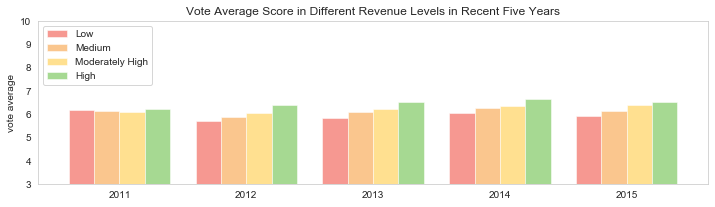

In [45]:
# Setting the positions and width for the bars
pos = list(range(len(dfq2_summary.query('revenue_levels =="Low"'))))
width = 0.2 

# Plotting the bars
fig, ax = plt.subplots(figsize=(12,3))

# Create a bar with Low data, in position pos,
plt.bar(pos, 
        #using 'Low' data,
        dfq2_summary.query('revenue_levels =="Low"')['vote_average'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label Low
        label= 'Low') 

# Create a bar with Medium data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using Medium data,
        dfq2_summary.query('revenue_levels =="Medium"')['vote_average'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label Medium
        label='Medium') 

# Create a bar with Moderately High data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using Moderately High data,
        dfq2_summary.query('revenue_levels =="Moderately High"')['vote_average'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label Moderately High
        label='Moderately High') 

# Create a bar with High data,
# in position pos + some width buffer,
plt.bar([p + width*3 for p in pos], 
        #using High data,
        dfq2_summary.query('revenue_levels =="High"')['vote_average'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#4fb427', 
        # with label High
        label='High')

# Set the y axis label
ax.set_ylabel('vote average')

# Set the chart's title
ax.set_title('Vote Average Score in Different Revenue Levels in Recent Five Years')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels([2011,2012,2013,2014,2015])

#set y-axis height
plt.ylim(3, 10)

# Adding the legend and showing the plot
plt.legend(loc='upper left')
plt.grid()
plt.show()

Judging from the result above, we can conclude that there is no big diference of the movie rating between each revenue level. We would conclude from this that the higher revenue movie doesn't necessarily have the hign scrore rating.

#### Section summary

* Throughout the years, movie popularity is is growing up. The reason is that nowadays movie information and the rating system are easily accessible.
* Movies with higher revenue are with higer popilarity in the recent five years.
* Movies with the higher revenue don't necessarily have the high score rating in the recent five years.


### Research Question 3. - What kinds of properties are associated with movies that have high popularity? What kinds of properties are associated with movies that have high voting score?


We can guess from the dataset that the potenatial properties that can be associated with movies are `runtime`, `cast`, `director`, `keywords`, `genres`, `production companies`. 

If we look closer to these data, we will see that they are two types : `quantitive` (runtime and budget) and `categorical` (the rest) data. 

Quatitative data can be devided into various of levels to find the properties in all the range of movies success. It would be good to use the whole dataset then divide the runtime and budget into four levels according to theire quartile: 'Low', 'Medium', 'Moderately High', 'High' in all time range and then find out what's the runtime and budget level with higher degree of movie popularity/voting score.

Since we are not to discuss all the range of movies success, we will just fucus on higher popularity or higher rating. Hence, we will just filter the top 100 popuplar/high voting score movies data in each year, cut the number of occurrences in every category every year ti find the properties. 

_______________

Forthermore, in case that the top frequent occurrences are also appeared in the worst popular / high voting score movies, I also filter the worst 100 popular/ high voting score movies in every year and then compare the result to top 100's. If the top frequent occurrences also appear in the worst movies, I am going to include these factors as properties associated with top movies as well as worst movies. Besides, these data are contain the pipe (|) characters so first I have to spilt them. </b>

A. Function Prepare-- Build a level-devide function and a split string function.
A)The cut_into_quantile function- general use.

The function is the same I ued in the Part 1 Question. So I just past it again below.


_____

A function to find the top three factor after using the split pipe in order to count their number of appeared times


In [47]:
# split pipe characters and count their number of appeared times
#argument:dataframe_col is the target dataframe&column; num is the number of the top factor
def find_top(dataframe_col, num=3):
    # split the characters in the input column 
    #and make it to a list
    alist = dataframe_col.str.cat(sep='|').split('|')
    #transfer it to a dataframe
    new = pd.DataFrame({'top' :alist})
    #count their number of appeared times and
    #choose the top3
    top = new['top'].value_counts().head(num)
    return top

let's now Filter Top 100 and Worst 100 movies in each year as the research sample.
#### 
Top 100 popular movies in every year.

In [49]:
# Select Top 100 popular movies.
# fisrt sort it by release year ascending and popularity descending
df_top_p = df.sort_values(['release_year','popularity'], ascending=[True, False])
#group by year and choose the top 100 high
df_top_p = df_top_p.groupby('release_year').head(100).reset_index(drop=True)
#check, it must start from 1960, and with high popularity to low
df_top_p.head(2)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,539,2.610362,806948.0,32000000.0,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,Shamley Productions,8/14/60,1180,8.0,1960
1,966,1.872132,2000000.0,4905000.0,The Magnificent Seven,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,John Sturges,horse|village|friendship|remake|number in title,128,Action|Adventure|Western,The Mirisch Corporation|Alpha Productions,10/23/60,224,7.0,1960


#### Top 100 high revenue movies in every year.

In [50]:
# Select Top 100 high revenue movies.
# fisrt sort it by release year ascending and revenue descending
df_top_r = df.sort_values(['release_year','revenue'], ascending=[True, False])
#group by year and choose the top 100 high
df_top_r = df_top_r.groupby('release_year').head(100).reset_index(drop=True)
#check, it must start from 1960, and with high revenue to low
df_top_r.head(2)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,967,1.136943,12000000.0,60000000.0,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,Stanley Kubrick,gladiator|roman empire|gladiator fight|slavery...,197,Action|Drama|History,Bryna Productions,10/6/60,211,6.9,1960
1,539,2.610362,806948.0,32000000.0,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,Shamley Productions,8/14/60,1180,8.0,1960


#### Top 100 high score rating movies in every year.

In [51]:
# Select Top 100 high scorer ating movies.
# fisrt sort it by release year ascending and high scorer ating descending
df_top_s = df.sort_values(['release_year','vote_average'], ascending=[True, False])
#group by year and choose the top 100 high
df_top_s = df_top_s.groupby('release_year').head(100).reset_index(drop=True)
#check, it must start from 1960, and with high scorer ating to low
df_top_s.head(2)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,539,2.610362,806948.0,32000000.0,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,Shamley Productions,8/14/60,1180,8.0,1960
1,284,0.947307,3000000.0,25000000.0,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,Billy Wilder,new york|new year's eve|lovesickness|age diffe...,125,Comedy|Drama|Romance,United Artists|The Mirisch Company,6/15/60,235,7.9,1960


let's create a sub dataset for the last 100 movies to compare the results

In [53]:
# the last 100 popular movies in every year
df_low_p = df.sort_values(['release_year','popularity'], ascending=[True, True])
df_low_p = df_low_p.groupby('release_year').head(100).reset_index(drop=True)
# the last 100 high revenue movies in every year
df_low_r = df.sort_values(['release_year','revenue'], ascending=[True, True])
df_low_r = df_low_r.groupby('release_year').head(100).reset_index(drop=True)
# the last 100 score rating movies in every year
df_low_s = df.sort_values(['release_year','vote_average'], ascending=[True, True])
df_low_s = df_low_s.groupby('release_year').head(100).reset_index(drop=True)


Let's divide the budget data into four levels with its quartile and create a level column

In [54]:
# use cut_into_quantile function to build a level column
df = cut_into_quantile(df,'budget')
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_levels
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,High


In [55]:
# Find the mean and median popularity of each level with groupby
result_mean = df.groupby('budget_levels')['popularity'].mean()
result_mean

budget_levels
Low                0.510678
Medium             0.726490
Moderately High    0.988660
High               1.821742
Name: popularity, dtype: float64

In [56]:
result_median = df.groupby('budget_levels')['popularity'].median()
result_median

budget_levels
Low                0.367621
Medium             0.507987
Moderately High    0.733975
High               1.232098
Name: popularity, dtype: float64

Let's handle the visualization now

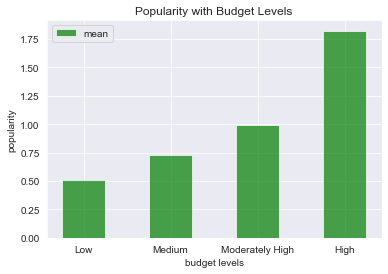

In [60]:
# the x locations for the groups
ind = np.arange(len(result_mean))  
# the width of the bars
width = 0.5       


# plot bars
#set style
sns.set_style('darkgrid')
bars = plt.bar(ind, result_mean, width, color='g', alpha=.7, label='mean')

# title and labels
plt.ylabel('popularity')
plt.xlabel('budget levels')
plt.title('Popularity with Budget Levels')
locations = ind  # xtick locations，345...
labels = result_median.index  
plt.xticks(locations, labels)
# legend
plt.legend()

Notice on the figure above that movies with higer popularity are with higher budget level. This makes sense because for a movie to be popular it has to be promoted a lot. therefore the promoting advertisement will cost. 

let's divide the runtime data into four levels with it's quartile: 'Short', 'Medium', 'Moderately Long', 'Long'.

In [61]:
df = cut_into_quantile(df,'runtime')
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_levels,runtime_levels
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,High,High


In [62]:
# Find the mean popularity of each level with groupby
result_mean = df.groupby('runtime_levels')['popularity'].mean()
result_mean

runtime_levels
Low                0.418723
Medium             0.551560
Moderately High    0.656342
High               1.019749
Name: popularity, dtype: float64

In [63]:
# Find the median popularity of each level with groupby
result_median = df.groupby('runtime_levels')['popularity'].median()
result_median

runtime_levels
Low                0.290399
Medium             0.366125
Moderately High    0.420568
High               0.529933
Name: popularity, dtype: float64

Let's handle the visualisation now

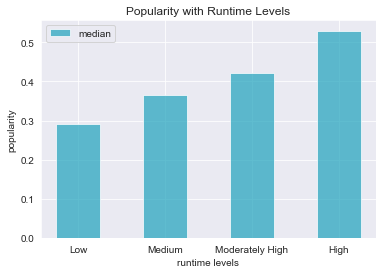

In [65]:
ind = np.arange(len(result_median))  # the x locations for the groups
width = 0.5       # the width of the bars

# plot bars
bars = plt.bar(ind, result_median, width, color='#1ea2bc', alpha=.7, label='median')

# title and labels
plt.ylabel('popularity')
plt.xlabel('runtime levels')
plt.title('Popularity with Runtime Levels')
locations = ind  # xtick locations，345...
labels = result_median.index  
plt.xticks(locations, labels)
# legend
plt.legend()

We can tell from the result above that movies with higher popularity have longer runtime

 let's check the casts, directors, keywords, genres and production companies which are associated with high popularity?

In [66]:
df_top_p.head(2)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,539,2.610362,806948.0,32000000.0,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,Shamley Productions,8/14/60,1180,8.0,1960
1,966,1.872132,2000000.0,4905000.0,The Magnificent Seven,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,John Sturges,horse|village|friendship|remake|number in title,128,Action|Adventure|Western,The Mirisch Corporation|Alpha Productions,10/23/60,224,7.0,1960


let's find the three highest occurrences in each category among the top 100 popular movies.

In [67]:
# find top three cast
a = find_top(df_top_p.cast)
# find top three director
b = find_top(df_top_p.director)
# find top three keywords
c = find_top(df_top_p.keywords)
# find top three genres
d = find_top(df_top_p.genres)
# find top three production companies
e = find_top(df_top_p.production_companies)

let's create a summary table

In [68]:
#Use the result above to create a summary dataframe.
df_popular = pd.DataFrame({'popular_cast': a.index, 'popular_director': b.index, 'popular_keywords': c.index, 'popular_genres': d.index, 'popular_producer': e.index})
df_popular

,popular_cast,popular_director,popular_keywords,popular_genres,popular_producer
0,Robert De Niro,Woody Allen,based on novel,Drama,Warner Bros.
1,Bruce Willis,Steven Spielberg,sex,Comedy,Universal Pictures
2,Nicolas Cage,Clint Eastwood,dystopia,Thriller,Paramount Pictures


let's find the three highest occurrences in each category among the 100 unpopular movies.

In [69]:
# call the dataset wiht the 100 unpopular movies in each year
df_low_p.head(2)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,18973,0.055821,3000000.0,7100000.0,Cinderfella,Jerry Lewis|Ed Wynn|Judith Anderson|Henry Silv...,Frank Tashlin,NaN,91,Comedy|Romance,Paramount Pictures|Jerry Lewis Productions,12/18/60,13,7.2,1960
1,39890,0.065808,NaN,NaN,The City of the Dead,Christopher Lee|Dennis Lotis|Patricia Jessel|T...,John Llewellyn Moxey,witch|burning of witches|witch burning|witchcraft,76,Horror,Vulcan Productions Inc.,9/9/60,13,6.1,1960


In [71]:
# find top three cast among the among the 100 unpopular movies
na = find_top(df_low_p.cast)
# find top three director among the among the 100 unpopular movies
nb = find_top(df_low_p.director)
# find top three keywords among the among the 100 unpopular movies
nc = find_top(df_low_p.keywords)
# find top three genres among the among the 100 unpopular movies
nd = find_top(df_low_p.genres)
# find top three production companiess among the among the 100 unpopular movies
ne = find_top(df_low_p.production_companies)

df_unpopular = pd.DataFrame({'unpopular_cast': na.index, 'unpopular_director': nb.index, 'unpopular_keywords': nc.index, 'unpopular_genres': nd.index, 'unpopular_producer': ne.index})
df_unpopular

,unpopular_cast,unpopular_director,unpopular_keywords,unpopular_genres,unpopular_producer
0,Clint Eastwood,Woody Allen,independent film,Drama,Universal Pictures
1,Michael Caine,Clint Eastwood,woman director,Comedy,Warner Bros.
2,Sean Connery,Blake Edwards,sex,Thriller,Paramount Pictures


In [73]:
# compare
df_popular

,popular_cast,popular_director,popular_keywords,popular_genres,popular_producer
0,Robert De Niro,Woody Allen,based on novel,Drama,Warner Bros.
1,Bruce Willis,Steven Spielberg,sex,Comedy,Universal Pictures
2,Nicolas Cage,Clint Eastwood,dystopia,Thriller,Paramount Pictures


Let's compare the two tables above and take conclusions. 

1. director Woody Allen and Clint Eastwood are appeared in both popular and unpopular movies; 
2. all three genres Drama, Comedy, Thriller are appeared in both popular and unpopular movies;
3. sex is appeared in both popular and unpopular movies;
4. all three producer Universal Pictures, Warner Bros, Paramount Pictures are appeared in both popular and unpopular movies.

Conclusions:

* casts associated with high popularity are  Robert De Niro and Bruce Willis
* Directors associated with high popularity movies are Steven Spielberg. This makes sense because the guys a lot of awards and prices of recognition. 
* Both of the most popular and unpopular movies are associated three mainly genres: Drama, Comedy, and Thriller. This implies that these are the most common genres in the industry
* Keywords associated with high popularity movies: based on novel and dystopia. Most of the movies which are famous out there are really based on the two. it's not a surprise that it comes out like that.
* Producer associated with high popularity movies and unpopularity movies: Warner Bros., Universal Pictures and Paramount Pictures. The three giants of movie indusry did produce such a various quality movies!

### Research Question 4. What kinds of properties are associated with movies that have high voting score?


let's use dataframe the with budget level I have created in the previous then find the mean and median of vote_average group by different budget level.



In [74]:
result_mean = df.groupby('budget_levels')['vote_average'].mean()
result_mean

budget_levels
Low                5.947569
Medium             6.016922
Moderately High    6.066133
High               6.104504
Name: vote_average, dtype: float64

In [75]:
result_median = df.groupby('budget_levels')['vote_average'].median()
result_median

budget_levels
Low                6.0
Medium             6.1
Moderately High    6.1
High               6.1
Name: vote_average, dtype: float64

Let's handle the visualization

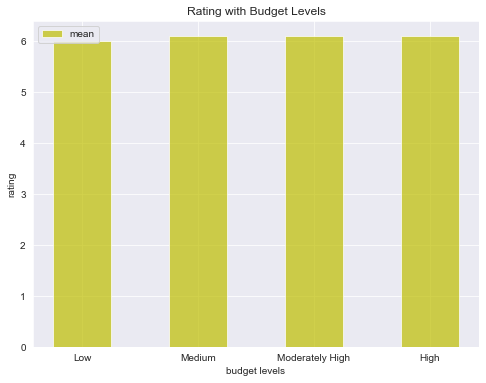

In [76]:
# plot bars
#set style
sns.set_style('darkgrid')
ind = np.arange(len(result_mean))  # the x locations for the groups
width = 0.5       # the width of the bars

# plot bars
plt.subplots(figsize=(8, 6))
bars = plt.bar(ind, result_median, width, color='y', alpha=.7, label='mean')

# title and labels
plt.ylabel('rating')
plt.xlabel('budget levels')
plt.title('Rating with Budget Levels')
locations = ind  # xtick locations，345...
labels = result_median.index  
plt.xticks(locations, labels)
# legend
plt.legend( loc='upper left')

The result above shows that there is no big difference in average voting score at different budget levels. This implies that may be a high budget movie is not necessarily a good quality movie.

let's check the runtime levels which are associated with movies that have high voting score

In [77]:
# Find the mean popularity of each level with groupby
result_mean = df.groupby('runtime_levels')['vote_average'].mean()
result_mean

runtime_levels
Low                5.726425
Medium             5.724355
Moderately High    6.044946
High               6.401297
Name: vote_average, dtype: float64

In [78]:
result_median = df.groupby('runtime_levels')['vote_average'].median()
result_median

runtime_levels
Low                5.8
Medium             5.8
Moderately High    6.1
High               6.4
Name: vote_average, dtype: float64

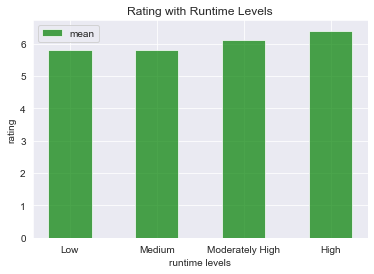

In [79]:
ind = np.arange(len(result_mean))  # the x locations for the groups
width = 0.5       # the width of the bars

# plot bars
bars = plt.bar(ind, result_median, width, color='g', alpha=.7, label='mean')

# title and labels
plt.ylabel('rating')
plt.xlabel('runtime levels')
plt.title('Rating with Runtime Levels')
locations = ind  # xtick locations，345...
labels = result_median.index  
plt.xticks(locations, labels)
# legend
plt.legend()

Once again the result above shows that there is no big diference in average voting score in different runtime levels. This implies that maybe long runtime of a movie is not necessary to a good quality of movie.

### Research Question 4. What's the directors, keywords, genres are associated with voting score?

let's use the dateframe about top 100 high voting score movies in each year.

In [80]:
df_top_s.head(2)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,539,2.610362,806948.0,32000000.0,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,Shamley Productions,8/14/60,1180,8.0,1960
1,284,0.947307,3000000.0,25000000.0,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,Billy Wilder,new york|new year's eve|lovesickness|age diffe...,125,Comedy|Drama|Romance,United Artists|The Mirisch Company,6/15/60,235,7.9,1960


then let's find the three highest occurrences in each category then put it in a summary table

In [82]:
# find top three director
a = find_top(df_top_s.director)
# find top three keywords
b = find_top(df_top_s.keywords)
# find top three genres
c = find_top(df_top_s.genres)

#create a summary dataframe.
df_high_score = pd.DataFrame({'high_score_director': a.index, 'high_score_keywords': b.index, 'high_score_genres': c.index})
df_high_score

,high_score_director,high_score_keywords,high_score_genres
0,Woody Allen,based on novel,Drama
1,Martin Scorsese,independent film,Comedy
2,Clint Eastwood,woman director,Thriller


let's find the three highest occurrences in each category

In [85]:
# call the dataset wiht the 100 low rating movies in each year
df_low_s.head(5)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,24014,0.875173,NaN,NaN,Let's Make Love,Marilyn Monroe|Yves Montand|Tony Randall|Frank...,George Cukor,musical,114,Comedy|Romance,Twentieth Century Fox Film Corporation|The Com...,10/7/60,15,4.9,1960
1,6643,0.421043,NaN,NaN,The Unforgiven,Burt Lancaster|Audrey Hepburn|Audie Murphy|Joh...,John Huston,indian|texas|farm|siblings|saddle,125,Action|Drama|Western,James Productions,1/1/60,17,4.9,1960
2,25767,0.390240,NaN,6000000.0,The Grass Is Greener,Cary Grant|Deborah Kerr|Robert Mitchum|Jean Si...,Stanley Donen,cheating husband|millionaire|oil tycoon,104,Comedy|Drama|Romance,Grandon Productions,12/23/60,12,4.9,1960
3,18780,0.194948,NaN,NaN,Sink the Bismarck!,Kenneth More|Dana Wynter|Carl MÃ¶hner|Laurence...,Lewis Gilbert,NaN,97,Action|Drama|Foreign|History|War,Twentieth Century Fox Film Corporation,2/11/60,12,4.9,1960
4,43040,0.269428,NaN,NaN,Sergeant Rutledge,Jeffrey Hunter|Woody Strode|Constance Towers|B...,John Ford,rape|court martial,111,Crime|Western,John Ford Productions,5/18/60,12,5.2,1960


In [84]:
# find top three director among the among the 100 low rating movies
na = find_top(df_low_s.director)
# find top three keywords among the among the 100 low rating movies
nb = find_top(df_low_s.keywords)
# find top three genres among the among the 100 low rating movies
nc = find_top(df_low_s.genres)

let's create a summary table

In [86]:
df_low_score = pd.DataFrame({'low_score_director': na.index, 'low_score_keywords': nb.index, 'low_score_genres': nc.index})
df_low_score

,low_score_director,low_score_keywords,low_score_genres
0,Woody Allen,sex,Comedy
1,John Carpenter,independent film,Drama
2,John Landis,suspense,Thriller


In [87]:
# compare
df_high_score

,high_score_director,high_score_keywords,high_score_genres
0,Woody Allen,based on novel,Drama
1,Martin Scorsese,independent film,Comedy
2,Clint Eastwood,woman director,Thriller


Looking at the two tables above, we can notice that: 

* Martin Scorsese and Clint Eastwood have made top quality movies on average over the past years from 1960.
* The top quality movies have the keywords with based on novel and woman director over the past years from 1960.

### Research Question 5. What are the keywords trends by generation?

Let's group and count the number of movies released in a year then visualize the result

In [88]:
movie_count = df.groupby('release_year').count()['id']
movie_count.head()

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: id, dtype: int64

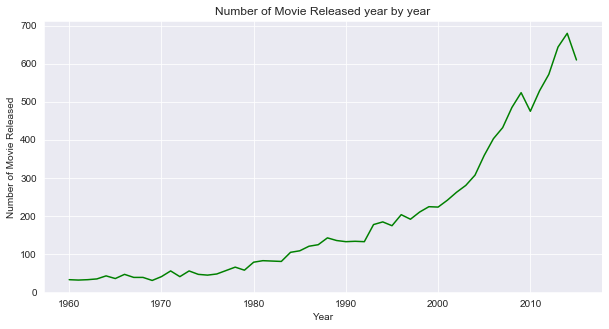

In [89]:
sns.set_style('darkgrid')
#set x, y axis data
# x is movie release year
x = movie_count.index
# y is number of movie released
y = movie_count
#set size
plt.figure(figsize=(10, 5))
#plot line chart 
plt.plot(x, y, color = 'g', label = 'mean')
#set title and labels
plt.title('Number of Movie Released year by year')
plt.xlabel('Year')
plt.ylabel('Number of Movie Released');

As sugested by the figure above, the number of movies per year is increasing over the years. The curve being concave upward implies that the growth is accelerated.

___

let's find the Keywords Trends by Generation then build categories as decades

In [90]:
# sort the movie release year list.
dfyear= df.release_year.unique()
dfyear= np.sort(dfyear)
dfyear

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015])

In [91]:
# year list of 1960s
y1960s =dfyear[:10]
# year list of 1970s
y1970s =dfyear[10:20]
# year list of 1980s
y1980s =dfyear[20:30]
# year list of 1990s
y1990s = dfyear[30:40]
# year list of afer 2000
y2000 = dfyear[40:]

For each generation, let's find the most appeared keywords.

In [96]:
#generation name
names = ['1960s', '1970s', '1980s', '1990s', 'after2000']
#creat a empty dataframe,df_r3
df_r3 = pd.DataFrame()
index = 0
#for each generation, do the following procedure
for s in [y1960s, y1970s, y1980s, y1990s, y2000]:
    # first filter dataframe with the selected generation, and store it to dfn
    dfn = df[df.release_year.isin(s)] 
    #apply the find_top function with the selected frame, using the result create a dataframe, store it to dfn2 
    dfn2 = pd.DataFrame({'year' :names[index],'top': find_top(dfn.keywords,1)})
     #append dfn2 to df_q2
    df_r3 = df_r3.append(dfn2)
    index +=1
df_r3

,year,top
based on novel,1960s,16
based on novel,1970s,23
nudity,1980s,39
independent film,1990s,80
woman director,after2000,347


The result above implies that in the 60s and 70s, the top kewords were based on novels. However, in the 80s,  it was based on nudity, which is quite attention catching. In the 90s, the films were independant and after 2000 the movies with woman director were released the most.

___
let's visualize the result

Text(0.5, 1.0, 'Keywords Trends by Generation')

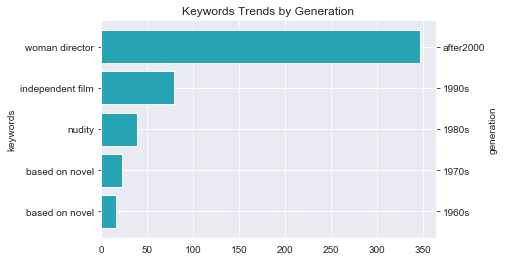

In [97]:
# Setting the positions
generation = ['1960s', '1970s', '1980s', '1990s', 'after2000']
keywords = df_r3.index
y_pos = np.arange(len(generation))
fig, ax = plt.subplots()
# Setting y1: the keywords number
y1 = df_r3.top
# Setting y2 again to present the right-side y axis labels
y2 = df_r3.top
#plot the bar
ax.barh(y_pos,y1, color = '#007482')
#set the left side y axis ticks position
ax.set_yticks(y_pos)
#set the left side y axis tick label
ax.set_yticklabels(keywords)
#set left side y axis label
ax.set_ylabel('keywords')

#create another axis to present the right-side y axis labels
ax2 = ax.twinx()
#plot the bar
ax2.barh(y_pos,y2, color = '#27a5b4')
#set the right side y axis ticks position
ax2.set_yticks(y_pos)
#set the right side y axis tick label
ax2.set_yticklabels(generation)
#set right side y axis label
ax2.set_ylabel('generation')
#set title
ax.set_title('Keywords Trends by Generation')

Let's have a look to Genres Trends by Generation. In this section we will use quite the same approach as in the previous one

In [98]:
# year list of each generation
times = [y1960s, y1970s, y1980s, y1990s, y2000]
#generation name
names = ['1960s', '1970s', '1980s', '1990s', 'after2000']
#creat a empty dataframe,df_r3
df_r3 = pd.DataFrame()
index = 0
#for each generation, do the following procedure
for s in times:
    # first filter dataframe with the selected generation, and store it to dfn
    dfn = df[df.release_year.isin(s)] 
    #apply the find_top function with the selected frame, using the result create a dataframe, store it to dfn2 
    dfn2 = pd.DataFrame({'year' :names[index],'top': find_top(dfn.genres,1)})
     #append dfn2 to df_q2
    df_r3 = df_r3.append(dfn2)
    index +=1
df_r3

,year,top
Drama,1960s,167
Drama,1970s,238
Comedy,1980s,428
Drama,1990s,862
Drama,after2000,3050


Text(0.5, 1.0, 'Genres Trends by Generation')

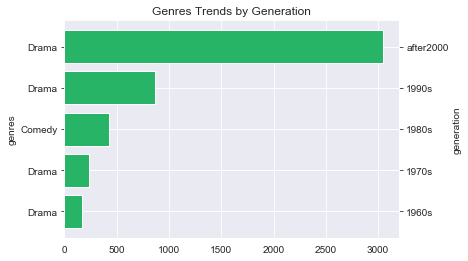

In [99]:
# Setting the positions
generation = ['1960s', '1970s', '1980s', '1990s', 'after2000']
genres = df_r3.index
y_pos = np.arange(len(generation))
fig, ax = plt.subplots()
# Setting y1: the genre number
y1 = df_r3.top
# Setting y2 again to present the right-side y axis labels
y2 = df_r3.top
#plot the bar
ax.barh(y_pos,y1, color = '#007482')
#set the left side y axis ticks position
ax.set_yticks(y_pos)
#set the left side y axis tick label
ax.set_yticklabels(genres)
#set left side y axis label
ax.set_ylabel('genres')

#create another axis to present the right-side y axis labels
ax2 = ax.twinx()
#plot the bar
ax2.barh(y_pos,y2, color = '#27b466')
#set the right side y axis ticks position
ax2.set_yticks(y_pos)
#set the right side y axis tick label
ax2.set_yticklabels(generation)
#set right side y axis label
ax2.set_ylabel('generation')
#set title
ax.set_title('Genres Trends by Generation')

We can tell from these results that only the 80 were dominated by comedy

<a id='conclusions'></a>
## Conclusions

To sumarize this work, I am going to break it down into 3 parts. in the first one I am going to talk about a `general overview exploration`, the second one the `properties associated with successfull movies` then the last one `keyword and genre trends by generation`


In the first part I noted the following: 
* The movie popularity rend is growing over the years from 1960. 
* Movies with high revenue have higher popularity in the recent five years
* Movies with higher revenue don't have the significant high score rating

The conclusions above caught my attention and made me want to know the properties which are assiciated with good movies. I ended up noting the following in the second part: 

* The properties associated with higher popularity movies are `high budget levels` and `longer run time`. 
* Cast associated with high popularity movies are `Robert de niro` and `Bruce willis`
* The director associated with high popularity movies is `Steven Spielberg`
* Genres associated with high popularity moviesare `drama, comedy, and thriller` however they also appear in the most unpopular ones
* Keywords associated with high popular movies are `Based on novel` and `Dystopia`
* The producer associated with high popularity movies are `Warner Bros`, `Universal Pictures` and `Paramount Pictures`
* The low / high budget level may not directly predict that a movy had higher ratings.
* Martin Scorsese and Clint Eastwood are the rockstar directors since the 60s

In the third part, I talked about the Top Keywords and Genres Trends by Generation

after exploring the number of movie realeased treand year by year and devided data into five generations I noted that: 

* Over the years, the number of move realeases kept increasing and it is an accelerated groth trend. 
* In the 90s and 70s the top keword was `based on novel`, in 80s was `Nudity`, in 90s `Independant films` and after 2000 the movies with the feature women director were released the most.
* Only the 80s were dominated by comedy. the other generations were dominated by drama. 


### Limitations

Although I had fun diving into the dataset, I found some limitations that I am going to share here.

* I found a lot of null values in the data set which made me get rid of a lot of records which might have helped to make my result a lot more consistent.
* The zero values in revenue and budget column were actually missing data.
* The metrics about popularity are not well defined. They might be changing year by year

* There was not clear information dbout the currencies of the budget and revenues
* There are chances that they high revenue covers a wide range and may affect final results though the discusion around popularity in different revenue levels was done only for the finve recent years.
